# Importing Imputed Data

In [19]:
import pandas as pd
DatasetI= pd.read_excel ('DatasetI3-PMM.xlsx')
DatasetI

,onetcontent,dspacing,SSA,AMR,BR,CR,Cationsize,Anionsize,Molarity,PW,Config,CD,Capacitance
0,12.9,0.66,14.80,80,10,10,3.58,3.79,1.0,0.5,3,2.0,83.0
1,12.9,0.66,14.80,80,10,10,3.58,3.79,1.0,0.5,3,3.0,71.0
2,12.9,0.66,14.80,80,10,10,3.58,3.79,1.0,0.5,3,5.0,64.0
3,12.9,0.66,14.80,80,10,10,3.58,3.79,1.0,0.5,3,7.0,59.0
4,12.9,0.66,14.80,80,10,10,3.58,3.79,1.0,0.5,3,10.0,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,0.0,0.66,8.71,80,10,10,3.31,3.00,1.0,0.5,3,7.5,120.0
617,0.0,0.66,8.71,80,10,10,3.31,3.00,1.0,0.5,3,10.0,80.0
618,0.0,0.66,8.71,80,10,10,3.31,3.00,1.0,0.5,3,12.5,73.0
619,0.0,0.66,8.71,80,10,10,3.31,3.00,1.0,0.5,3,15.0,58.0


# Imputation Evaluation-Kolmogorov-Smirnov Test

,KS Statistic,P-Value
SSA,0.066224,4.950283e-01
AMR,0.542277,4.082182e-13
BR,0.053240,9.984829e-01
CR,0.019846,1.000000e+00


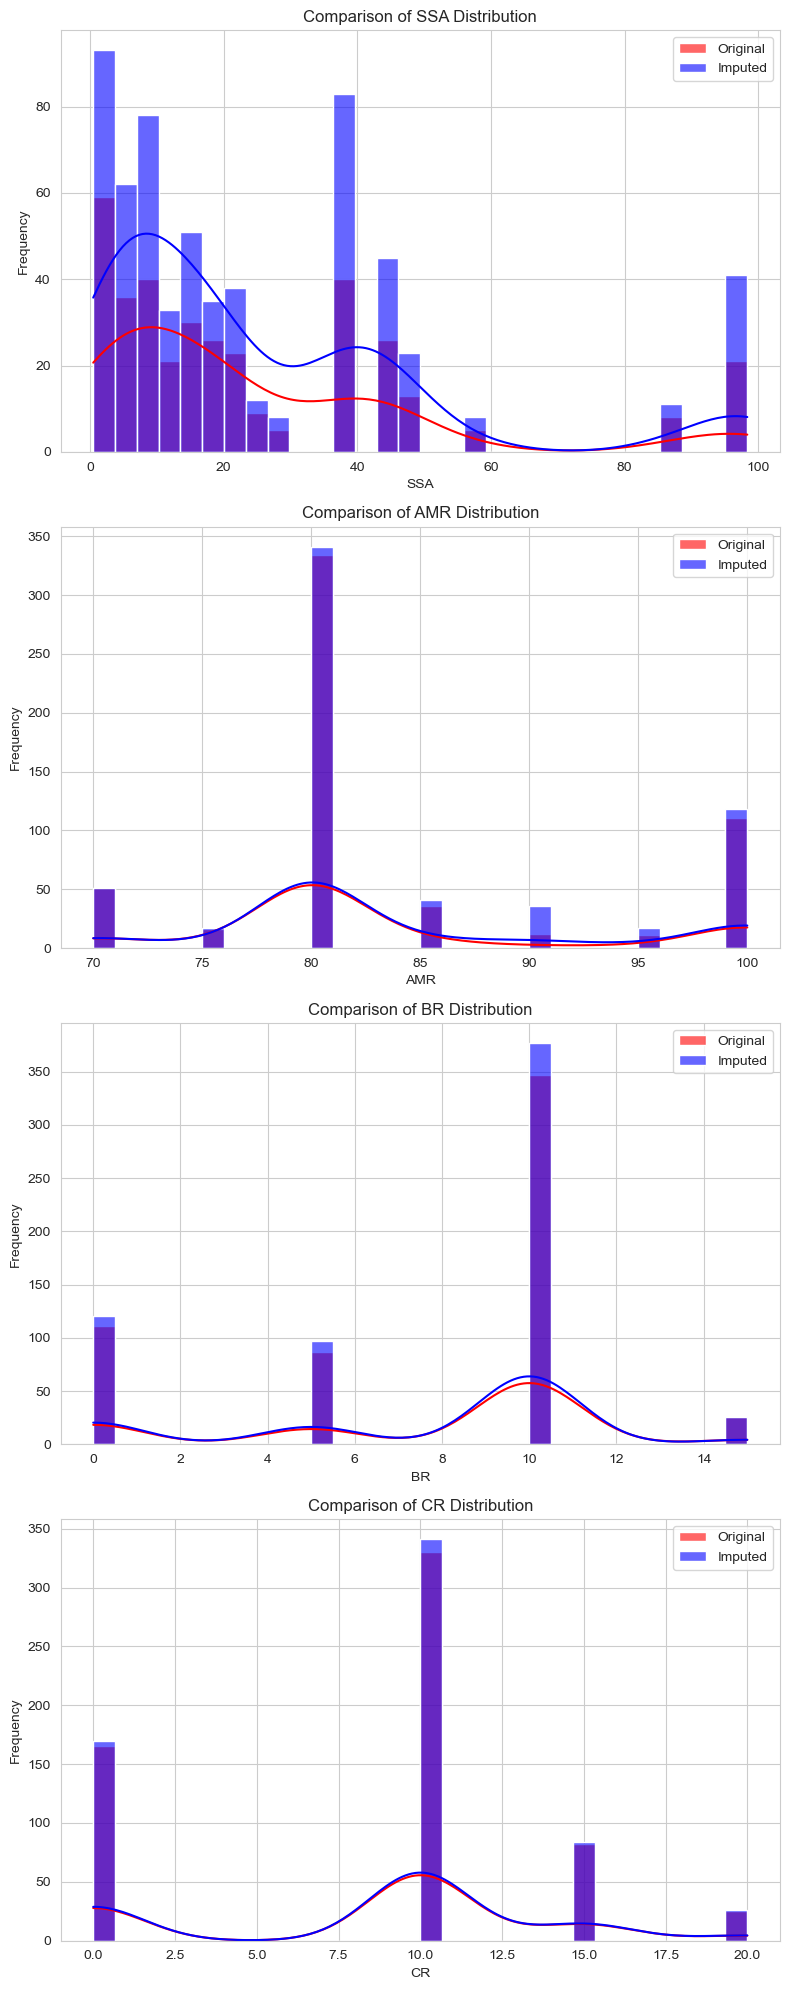

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp  
from IPython.display import display  

df_original = pd.read_excel("DatasetTBI.xlsx")  
df_imputed = pd.read_excel("DatasetI3-PMM.xlsx") 

num_cols_with_missing = df_original.select_dtypes(include=[np.number]).columns[df_original.isnull().any()]

# Kolmogorov-Smirnov test 
ks_test_results = {}

for col in num_cols_with_missing:
    original_values = df_original[col].dropna()  
    imputed_values = df_imputed[col].loc[df_original[col].isnull()] 
    
    if len(imputed_values) > 0: 
        ks_stat, p_value = ks_2samp(original_values, imputed_values)
        ks_test_results[col] = {"KS Statistic": ks_stat, "P-Value": p_value}

ks_results_df = pd.DataFrame.from_dict(ks_test_results, orient='index')

display(ks_results_df)

ks_results_df.to_excel("Kolmogorov-Smirnov Results.xlsx", index=True)

sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=len(num_cols_with_missing), ncols=1, figsize=(8, 5 * len(num_cols_with_missing)))

for ax, col in zip(axes, num_cols_with_missing):
    sns.histplot(df_original[col].dropna(), bins=30, kde=True, color='red', label='Original', ax=ax, alpha=0.6)
    sns.histplot(df_imputed[col], bins=30, kde=True, color='blue', label='Imputed', ax=ax, alpha=0.6)

    ax.set_title(f'Comparison of {col} Distribution')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.legend()

plt.tight_layout()
plt.show()